## Question 4: Experiment Design

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [2]:
# Load data
data = np.load("cv.npz")
Xlearn, ylearn, Xtest,ytest = data["Xlearn"], data["ylearn"], data["Xtest"], data["ytest"]

### Question 4(a): Train-Val-Test Experiment

In [3]:
alphas = np.logspace(-2, 2, 10)
X_train, X_val, y_train, y_val = train_test_split(Xlearn, ylearn, test_size=0.2, random_state=42)
mse_trs,mse_vals = [],[]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ytr_pred = ridge.predict(X_train)
    yval_pred = ridge.predict(X_val)
    mse_tr = mean_squared_error(y_train, ytr_pred)
    mse_trs.append(mse_tr)
    mse_val = mean_squared_error(y_val, yval_pred)
    mse_vals.append(mse_val)

best_alpha = alphas[np.argmin(mse_vals)]
bestmse_tr = mse_trs[np.argmin(mse_vals)]
bestmse_val = mse_vals[np.argmin(mse_vals)]

print(f"Best alpha: {best_alpha:.4f}")
print(f"Corresponding train MSE: {bestmse_tr:.4f}")
print(f"Corresponding validation MSE: {bestmse_val:.4f}")

Best alpha: 12.9155
Corresponding train MSE: 0.0016
Corresponding validation MSE: 0.5117


### Question 4(b): Crossvalidation-Test Experiment

In [4]:
alphas = np.logspace(-2, 2, 10)
#Add code here

crossval = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_trs,cv_mse_vals = [],[]

for alpha in alphas:
    K_mse_trs,K_mse_vals = [],[]

    for tr, val in crossval.split(Xlearn):
        Xtr_k,Xval_k = Xlearn[tr],Xlearn[val]
        ytr_k,yval_k = ylearn[tr],ylearn[val]

        ridge = Ridge(alpha=alpha)
        ridge.fit(Xtr_k, ytr_k)
        ytr_pred = ridge.predict(Xtr_k)
        yval_pred = ridge.predict(Xval_k)
        mse_tr = mean_squared_error(ytr_k, ytr_pred)
        mse_val = mean_squared_error(yval_k, yval_pred)
        
        K_mse_trs.append(mse_tr)
        K_mse_vals.append(mse_val)
    
    msetr_avg = np.mean(K_mse_trs)
    cv_mse_trs.append(msetr_avg)
    mseval_avg = np.mean(K_mse_vals)
    cv_mse_vals.append(mseval_avg)

best_alpha_cv = alphas[np.argmin(cv_mse_vals)]
best_msetr_cv = cv_mse_trs[np.argmin(cv_mse_vals)]
best_mseval_cv = cv_mse_vals[np.argmin(cv_mse_vals)]

print(f"Best alpha (Cross Validation): {best_alpha_cv:.4f}")
print(f"Corresponding train MSE (Cross Validation): {best_msetr_cv:.4f}")
print(f"Corresponding validation MSE (Cross Validation): {best_mseval_cv:.4f}")

Best alpha (Cross Validation): 1.6681
Corresponding train MSE (Cross Validation): 0.0000
Corresponding validation MSE (Cross Validation): 0.4549


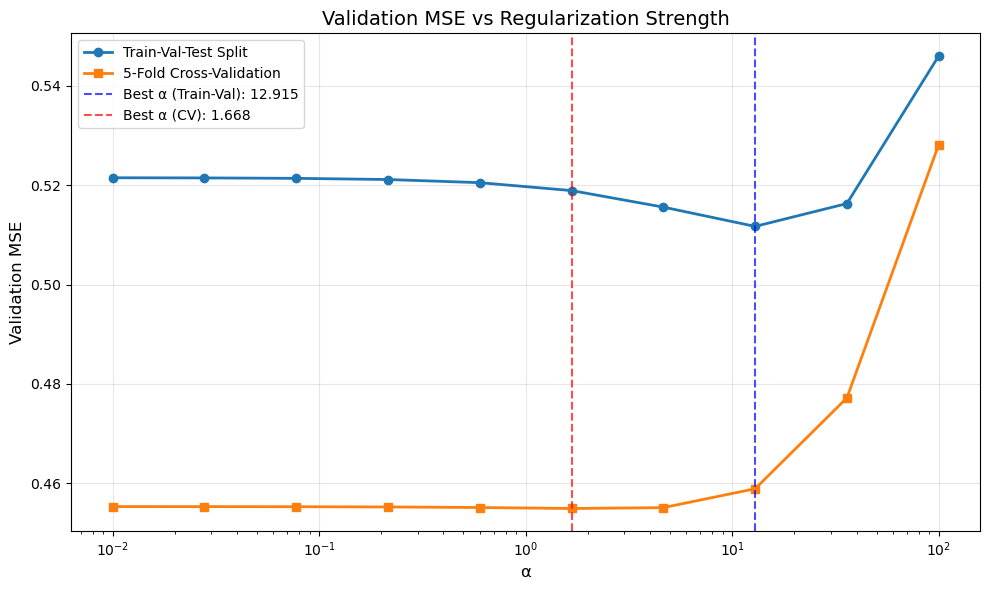

In [5]:
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mse_vals, 'o-', label='Train-Val-Test Split', linewidth=2, markersize=6)
plt.semilogx(alphas, cv_mse_vals, 's-', label='5-Fold Cross-Validation', linewidth=2, markersize=6)

plt.xlabel('α', fontsize=12)
plt.ylabel('Validation MSE', fontsize=12)
plt.title('Validation MSE vs Regularization Strength', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axvline(best_alpha, color='blue', linestyle='--', alpha=0.7, label=f'Best α (Train-Val): {best_alpha:.3f}')
plt.axvline(best_alpha_cv, color='red', linestyle='--', alpha=0.7, label=f'Best α (CV): {best_alpha_cv:.3f}')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()



### Question 4(d): Final Model re-Fits

In [6]:

ridge_1 = Ridge(alpha=best_alpha)
ridge_1.fit(Xlearn, ylearn)

ridge_cv = Ridge(alpha=best_alpha_cv)
ridge_cv.fit(Xlearn, ylearn)

y_tes_pred_1 = ridge_1.predict(Xtest)
msetest_1 = mean_squared_error(ytest, y_tes_pred_1)

y_test_pred_cv = ridge_cv.predict(Xtest)
msetest_cv = mean_squared_error(ytest, y_test_pred_cv)

print(f"Train-Val-Test method:")
print(f"  Best α: {best_alpha:.4f}")
print(f"  Test MSE: {msetest_1:.4f}")
print()
print(f"5-Fold Cross-Validation method:")
print(f"  Best α: {best_alpha_cv:.4f}")
print(f"  Test MSE: {msetest_cv:.4f}")
print()


Train-Val-Test method:
  Best α: 12.9155
  Test MSE: 0.3344

5-Fold Cross-Validation method:
  Best α: 1.6681
  Test MSE: 0.3101



### Question 4(e): Bonus

Number of experiments: 20
Train-Val-Test method:
  Mean test MSE: 0.3239
  Std test MSE: 0.0220
  Min test MSE: 0.3101
  Max test MSE: 0.3845

5-Fold Cross-Validation method:
  Mean test MSE: 0.3111
  Std test MSE: 0.0004
  Min test MSE: 0.3105
  Max test MSE: 0.3115


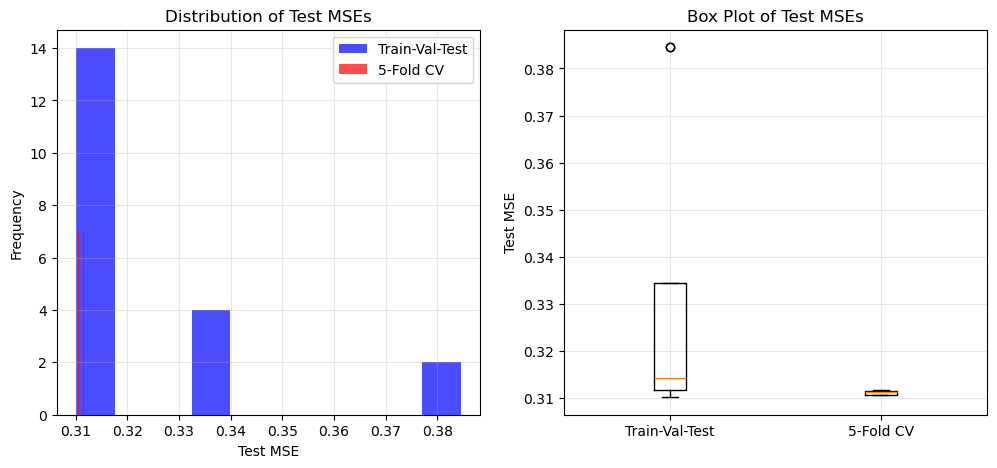

5-Fold CV is better in: 17/20
5-Fold Cross Validation's std: 0.0004
Train-Val-Test better: 1/20
Train-Val-Test's std: 0.0220
Both are equal: 2/20


In [8]:
#Add code here

np.random.seed(42) 
number=20
seeds =np.random.randint(0, 10000,size=number)

results_1_new,results_cv_new = [],[]

print(f"Number of experiments: {number}")

for i, seed in enumerate(seeds):
    Xtr_new, Xval_new, ytr_new, yval_new = train_test_split(
        Xlearn, ylearn, test_size=0.2, random_state=seed
    )
    
    msevals_new = []
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(Xtr_new, ytr_new)
        yval_pred_new = ridge.predict(Xval_new)
        mseval_new = mean_squared_error(yval_new, yval_pred_new)
        msevals_new.append(mseval_new)
    
    best_alpha_1_new = alphas[np.argmin(msevals_new)]
    ridge_final = Ridge(alpha=best_alpha_1_new)
    ridge_final.fit(Xlearn, ylearn)
    ytes_pred_new = ridge_final.predict(Xtest)
    msetest_new = mean_squared_error(ytest, ytes_pred_new)
    results_1_new.append(msetest_new)
    
    kfold_new = KFold(n_splits=5, shuffle=True, random_state=seed)
    msevals_k_new = []
    for alpha in alphas:
        msevals_k_new = []
        
        for tr, val in kfold_new.split(Xlearn):
            Xtr_k_new = Xlearn[tr]
            Xval_k_new = Xlearn[val]
            ytr_k_new = ylearn[tr]
            yval_k_new = ylearn[val]
            
            ridge = Ridge(alpha=alpha)
            ridge.fit(Xtr_k_new, ytr_k_new)
            yvalpred_k_new = ridge.predict(Xval_k_new)
            mseval_k_new = mean_squared_error(yval_k_new, yvalpred_k_new)
            msevals_k_new.append(mseval_k_new)
        
        mseval_k_avg_new = np.mean(msevals_k_new)
        msevals_k_new.append(mseval_k_avg_new)
    
    best_alpha_cv_meta = alphas[np.argmin(msevals_k_new)]
    ridge_k_final = Ridge(alpha=best_alpha_cv_meta)
    ridge_k_final.fit(Xlearn, ylearn)
    ytest_pred_k_new = ridge_k_final.predict(Xtest)
    msetes_k_new = mean_squared_error(ytest, ytest_pred_k_new)
    results_cv_new.append(msetes_k_new)

results_1_new = np.array(results_1_new)
results_cv_new = np.array(results_cv_new)

print(f"Train-Val-Test method:")
print(f"  Mean test MSE: {np.mean(results_1_new):.4f}")
print(f"  Std test MSE: {np.std(results_1_new):.4f}")
print(f"  Min test MSE: {np.min(results_1_new):.4f}")
print(f"  Max test MSE: {np.max(results_1_new):.4f}")

print(f"\n5-Fold Cross-Validation method:")
print(f"  Mean test MSE: {np.mean(results_cv_new):.4f}")
print(f"  Std test MSE: {np.std(results_cv_new):.4f}")
print(f"  Min test MSE: {np.min(results_cv_new):.4f}")
print(f"  Max test MSE: {np.max(results_cv_new):.4f}")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(results_1_new, bins=10, alpha=0.7, label='Train-Val-Test', color='blue')
plt.hist(results_cv_new, bins=10, alpha=0.7, label='5-Fold CV', color='red')
plt.xlabel('Test MSE')
plt.ylabel('Frequency')
plt.title('Distribution of Test MSEs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.boxplot([results_1_new, results_cv_new], tick_labels=['Train-Val-Test', '5-Fold CV'])
plt.ylabel('Test MSE')
plt.title('Box Plot of Test MSEs')
plt.grid(True, alpha=0.3)
plt.show()


print(f"5-Fold CV is better in: { np.sum(results_cv_new < results_1_new)}/{number}")
print(f"5-Fold Cross Validation's std: {np.std(results_cv_new):.4f}")
print(f"Train-Val-Test better: {np.sum(results_1_new < results_cv_new)}/{number}")
print(f"Train-Val-Test's std: {np.std(results_1_new):.4f}")
print(f"Both are equal: {np.sum(results_cv_new == results_1_new)}/{number}")

